<a href="https://colab.research.google.com/github/ki-kit/masters-thesis/blob/main/thesis_core_included.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Generating waveforms using PyCBC and CoRe database

We will be using the [PyCBC](http://github.com/ligo-cbc/pycbc) library, which is used to study gravitational-wave data, find astrophysical sources due to compact binary mergers, and study their parameters. These are some of the same tools that the LIGO and Virgo collaborations use to find gravitational waves in LIGO/Virgo data

In this tutorial we will walk through how find a specific signal in LIGO data. We present how to generate the waveform of a gravitational-wave merger and matched filtering, which is optimal in the case of Gaussian noise and a known signal model. In reality our noise is not entirely Guassian, and in practice we use a variety of techniques to separate signals from noise in addition to the use of the matched filter.

Additional [examples](http://pycbc.org/pycbc/latest/html/#library-examples-and-interactive-tutorials) and module level documentation are [here](http://pycbc.org/pycbc/latest/html/py-modindex.html)

#### Getting the software environment setup

PyCBC is installable through pip, but also relies on portions of the [LALSuite](https://git.ligo.org/lscsoft/lalsuite) c-library. A bundled version of this suitable for use with PyCBC is also available on Mac / Linux through pip. These can be installed as follows within the notebook.

In [ ]:
import sys
!{sys.executable} -m pip install pycbc ligo-common --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 185.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 143.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 56.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 42.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 153.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 MB 205.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 198.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/

### Generate your first waveform !

Here we'll generate the gravitational waveform using one of the available waveform approximants. These can be generated as a time series using [`get_td_waveform`](http://pycbc.org/pycbc/latest/html/pycbc.waveform.html#pycbc.waveform.waveform.get_td_waveform). There are some additional examples using this interface [here](http://pycbc.org/pycbc/latest/html/waveform.html). The key parameters are the masses of the binary (given in solar masses), the time between samples (in seconds), the starting gravitational-wave frequency (Hz) and the name of the approximant we'd like to generate. A variety of approximants are available that include different physical effects. A full review of the different models is outside of the scope of this tutorial.

In this example, we've chosen to use the 'SEOBNRv4_opt' model. There are many others available as well with different methodologies and which include different physical effects. This is an implementation of the model introduced [in this paper](https://arxiv.org/pdf/1611.03703.pdf). It models the gravitational waveform of inspiralling and merging black holes, and includes the ability for each black hole to spin in the same direction as the orbit (aligned spin).

/usr/local/lib/python3.10/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


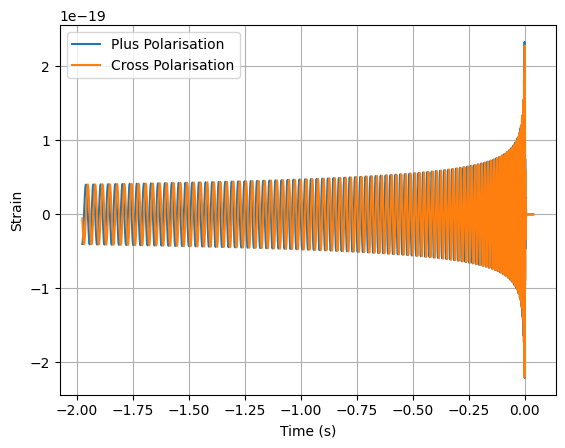

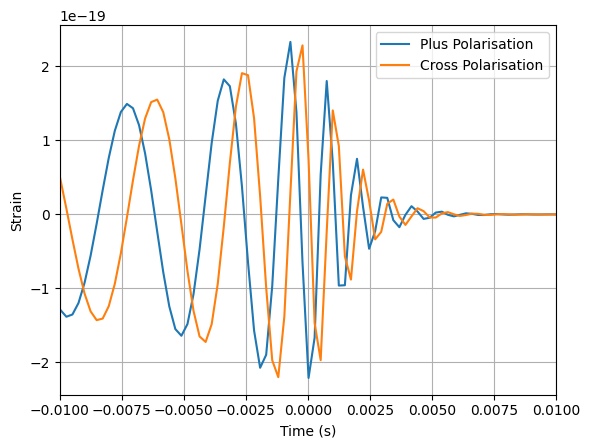

[-1.97555435 -1.97531021 -1.97506607 ...  0.0373851   0.03762924
  0.03787338]


In [ ]:
%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab
import matplotlib.pyplot as plt

# The output of this function are the "plus" and "cross" polarizations of the gravitational-wave signal
# as viewed from the line of sight at a given source inclination (assumed face-on if not provided)
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         f_lower=30)

pylab.plot(hp.sample_times, hp, label='Plus Polarisation')
pylab.plot(hp.sample_times, hc, label='Cross Polarisation')
plt.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.grid()
pylab.show()

# Zoom in near the merger time#
pylab.plot(hp.sample_times, hp, label='Plus Polarisation')
pylab.plot(hp.sample_times, hc, label='Cross Polarisation')
plt.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
pylab.show()

print(hp.sample_times)

We can see that in the this case, the two polariations differ only by the phase of the signal. This holds for systems where the orbital plane of the binary doesn't precess. In the zoom-in plot, we can see the merger itself and the ringdown that follows.

## **Custom waveform**
from https://pycbc.org/pycbc/latest/html/waveform.html

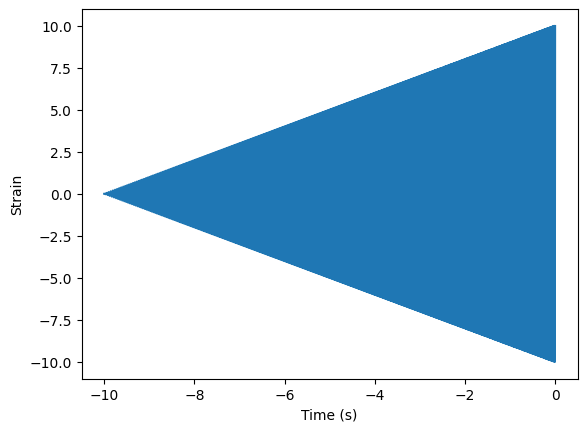

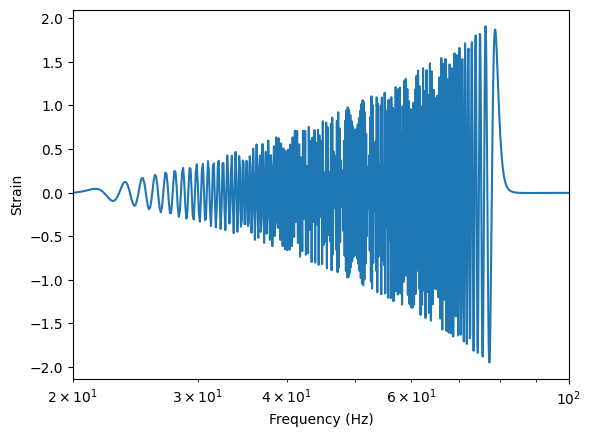

In [ ]:
import numpy
import matplotlib.pyplot as pp
import pycbc.waveform
from pycbc.types import TimeSeries



def test_waveform(**args):
    flow = args['f_lower'] # Required parameter
    dt = args['delta_t']   # Required parameter
    fpeak = args['fpeak']  # A new parameter for my model

    t = numpy.arange(0, 10, dt)
    f = t/t.max() * (fpeak - flow) + flow
    a = t

    wf = numpy.exp(2.0j * numpy.pi * f * t) * a

    # Return product should be a pycbc time series in this case for
    # each GW polarization
    #
    #
    # Note that by convention, the time at 0 is a fiducial reference.
    # For CBC waveforms, this would be set to where the merger occurs
    offset = - len(t) * dt
    wf = TimeSeries(wf, delta_t=dt, epoch=offset)
    return wf.real(), wf.imag()


# This tells pycbc about our new waveform so we can call it from standard
# pycbc functions. If this were a frequency-domain model, select 'frequency'
# instead of 'time' to this function call.
pycbc.waveform.add_custom_waveform('test', test_waveform, 'time', force=True)

# Let's plot what our new waveform looks like
hp, hc = pycbc.waveform.get_td_waveform(approximant="test",
                                        f_lower=20, fpeak=50,
                                        delta_t=1.0/4096)
pp.figure(0)
pp.plot(hp.sample_times, hp)
plt.ylabel('Strain')
pp.xlabel('Time (s)')

pp.figure(1)
hf = hp.to_frequencyseries()
pp.plot(hf.sample_frequencies, hf.real())
pp.ylabel('Strain')
pp.xlabel('Frequency (Hz)')
pp.xscale('log')
pp.xlim(20, 100)
pp.show()


then we use the previous code section to verify if the custom waveform codde was implemented correctly

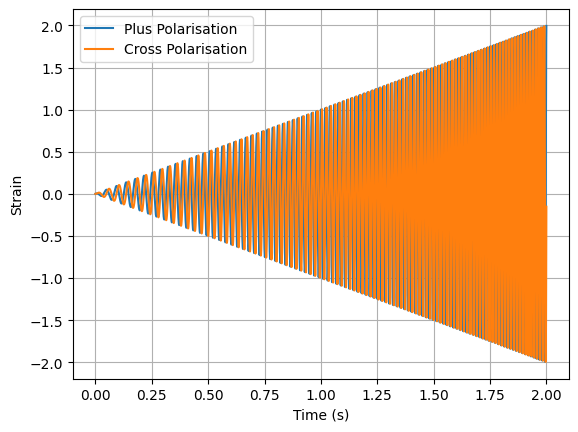

In [ ]:
# Define your custom waveform function
import numpy
from pycbc.types import TimeSeries
import matplotlib.pyplot as plt

def test_waveform(**args):
    flow = args['f_lower'] # Required parameter
    dt = args['delta_t']   # Required parameter
    fpeak = args['fpeak']  # A new parameter for my model

    t = numpy.arange(0, 2, dt)
    f = t/t.max() * (fpeak - flow) + flow
    a = t

    wf = numpy.exp(2.0j * numpy.pi * f * t) * a

    # Return product should be a pycbc time series in this case for each GW polarization
    # Note that by convention, the time at 0 is a fiducial reference.
    # For CBC waveforms, this would be set to where the merger occurs
    # offset = - len(t) * dt
    offset =  0
    wf = TimeSeries(wf, delta_t=dt, epoch=offset)
    return wf.real(), wf.imag()

# This tells pycbc about our new waveform so we can call it from standard pycbc functions.
# If this were a frequency-domain model, select 'frequency' instead of 'time' to this function call.
from pycbc.waveform import add_custom_waveform
add_custom_waveform('test', test_waveform, 'time', force=True)

# Generate waveforms using your custom function
from pycbc.waveform import get_td_waveform
import pylab

# The output of this function are the "plus" and "cross" polarizations of the gravitational-wave signal
# as viewed from the line of sight at a given source inclination (assumed face-on if not provided)
hp, hc = get_td_waveform(approximant="test",
                         f_lower=20, fpeak=50,
                         delta_t=1.0/4096)

pylab.plot(hp.sample_times, hp, label='Plus Polarisation')
pylab.plot(hp.sample_times, hc, label='Cross Polarisation')
plt.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.grid()
pylab.show()




CoRe data file loader:
its possible to load it either from git or from drive/dropbox

In [ ]:
!git clone https://core-gitlfs.tpi.uni-jena.de/core_database/BAM_0001.git

!pip install geopandas

import pandas as pd

!pip install core-watpy

Cloning into 'BAM_0001'...
remote: Enumerating objects: 48, done.
remote: Total 48 (delta 0), reused 0 (delta 0), pack-reused 48
Receiving objects: 100% (48/48), 5.82 KiB | 5.82 MiB/s, done.
Resolving deltas: 100% (19/19), done.
Filtering content: 100% (4/4), 70.32 MiB | 14.35 MiB/s, done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.6 MB/s eta 0:00:00


## CoRe waveform:
This section verifies if the CoRe waveform was loaded correctly.

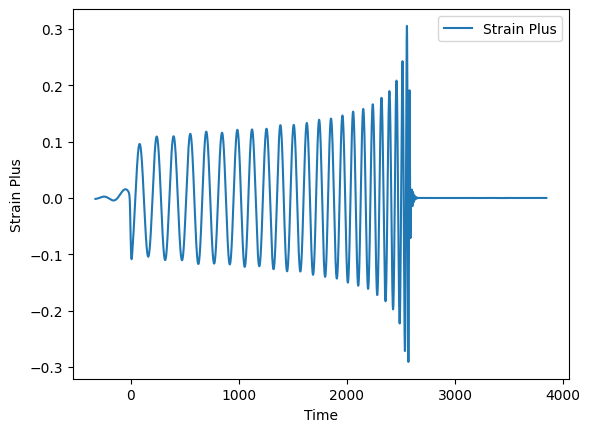

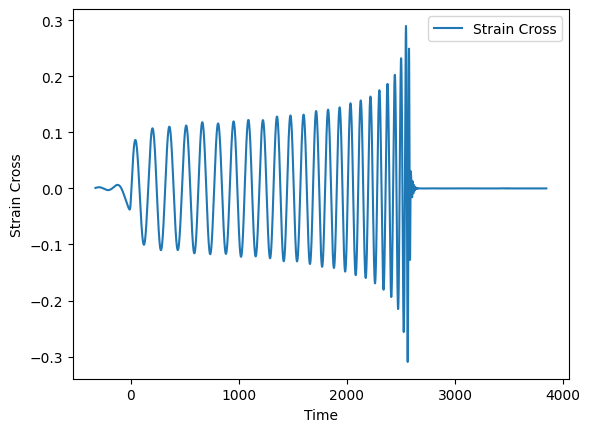

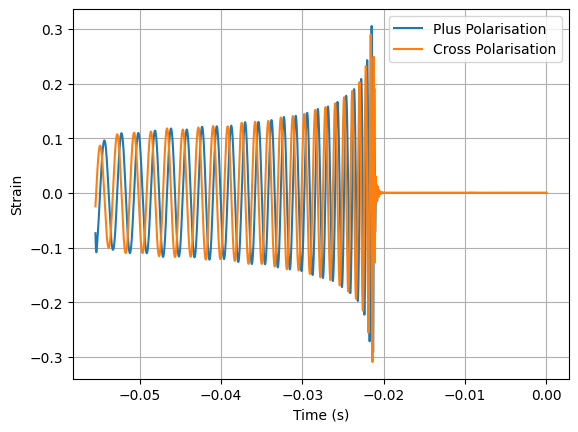

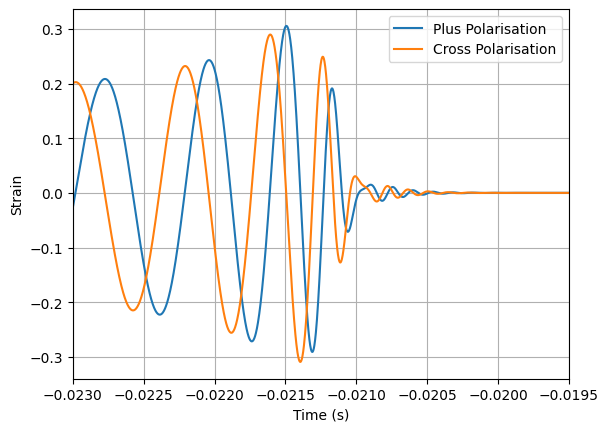

In [ ]:

import numpy as np
from matplotlib import pyplot as plt
from watpy.utils.coreh5 import CoRe_h5

from pycbc.types import TimeSeries
import pycbc.waveform

from astropy import constants as c

# First Code Snippet
from watpy.utils.coreh5 import CoRe_h5

coreh5_obj = CoRe_h5("/content/BAM_0001/R01/")
c_obj = CoRe_h5("/content/BAM_0001/R01/")

Time = c_obj.read('rh_22')[:,0]       #originally wrong units
M2sec = c.M_sun.value*c.G/c.c**3
Time = Time*2.7*M2sec.value
#Time = Time*c.M_sun.value*c.G.value/(c.c.value**3)
Strain_plus = c_obj.read('rh_22')[:,1]
Strain_cross = c_obj.read('rh_22')[:,2]

# Second Code Snippet
def test_waveform(**args):
	flow = args['f_lower'] # Required parameter
	dt = args['delta_t']   # Required parameter
	fpeak = args['fpeak']  # A new parameter for my model
	strain_plus = args['strain_plus']
	strain_cross = args['strain_cross']

	t = np.arange(0, len(strain_plus)*dt, dt)

	# Interpolate the strain_plus and strain_cross to match the time array
	strain_plus_interp = np.interp(t, Time, strain_plus)
	strain_cross_interp = np.interp(t, Time, strain_cross)

	# Combine the interpolated strains into a complex waveform
	waveform = strain_plus_interp + 1j * strain_cross_interp

	# Return product should be a pycbc time series in this case for each GW polarization
	offset = - len(t) * dt
	wf = TimeSeries(waveform, delta_t=dt, epoch=offset)
	return wf.real(), wf.imag()

# This tells pycbc about our new waveform so we can call it from standard
# pycbc functions. If this were a frequency-domain model, select 'frequency'
# instead of 'time' to this function call.
pycbc.waveform.add_custom_waveform('test', test_waveform, 'time', force=True)

# Let's plot what our new waveform looks like
hp, hc = pycbc.waveform.get_td_waveform(approximant="test",
                                    	f_lower=4.545056e+02, fpeak=8000, #4.545056e+02 and 8k
                                    	delta_t=Time[1]-Time[0],
                                    	strain_plus=Strain_plus,
                                    	strain_cross=Strain_cross)


coreh5_obj = CoRe_h5("/content/BAM_0001/R01/")
c_obj = CoRe_h5("/content/BAM_0001/R01/")

Time = c_obj.read('rh_22')[:,0]
Strain_plus = c_obj.read('rh_22')[:,1]
Strain_cross = c_obj.read('rh_22')[:,2]

plt.figure()
plt.plot(Time, Strain_plus, label='Strain Plus')
plt.xlabel('Time')
plt.ylabel('Strain Plus')
plt.legend()
plt.show()

plt.figure()
plt.plot(Time, Strain_cross, label='Strain Cross')
plt.xlabel('Time')
plt.ylabel('Strain Cross')
plt.legend()
plt.show()

# The two strains overlayed
pylab.plot(hp.sample_times, hp, label='Plus Polarisation')
pylab.plot(hp.sample_times, hc, label='Cross Polarisation')
plt.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.grid()
pylab.show()

# Zoom in near the merger time#
pylab.plot(hp.sample_times, hp, label='Plus Polarisation')
pylab.plot(hp.sample_times, hc, label='Cross Polarisation')
plt.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.xlim(-.023, -.0195)
pylab.legend()
pylab.grid()
pylab.show()

### **Custom waveform + CoRe + colab stuff**

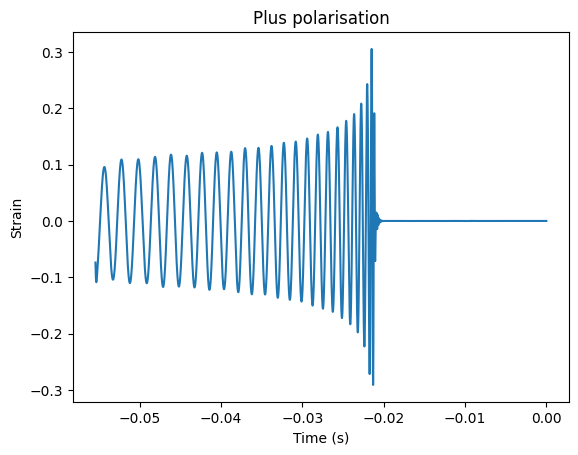

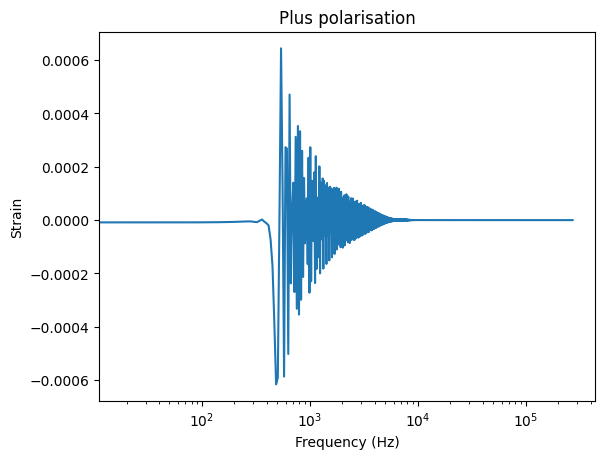

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pycbc.types import TimeSeries
import pycbc.waveform

from astropy import constants as c

# First Code Snippet
from watpy.utils.coreh5 import CoRe_h5

coreh5_obj = CoRe_h5("/content/BAM_0001/R01/")
c_obj = CoRe_h5("/content/BAM_0001/R01/")

Time = c_obj.read('rh_22')[:,0]       #originally wrong units
M2sec = c.M_sun.value*c.G/c.c**3
Time = Time*2.7*M2sec.value
#Time = Time*c.M_sun.value*c.G.value/(c.c.value**3)
Strain_plus = c_obj.read('rh_22')[:,1]
Strain_cross = c_obj.read('rh_22')[:,2]

# Second Code Snippet
def test_waveform(**args):
	flow = args['f_lower'] # Required parameter
	dt = args['delta_t']   # Required parameter
	fpeak = args['fpeak']  # A new parameter for my model
	strain_plus = args['strain_plus']
	strain_cross = args['strain_cross']

	t = np.arange(0, len(strain_plus)*dt, dt)

	# Interpolate the strain_plus and strain_cross to match the time array
	strain_plus_interp = np.interp(t, Time, strain_plus)
	strain_cross_interp = np.interp(t, Time, strain_cross)

	# Combine the interpolated strains into a complex waveform
	waveform = strain_plus_interp + 1j * strain_cross_interp

	# Return product should be a pycbc time series in this case for each GW polarization
	offset = - len(t) * dt
	wf = TimeSeries(waveform, delta_t=dt, epoch=offset)
	return wf.real(), wf.imag()

# This tells pycbc about our new waveform so we can call it from standard
# pycbc functions. If this were a frequency-domain model, select 'frequency'
# instead of 'time' to this function call.
pycbc.waveform.add_custom_waveform('test', test_waveform, 'time', force=True)

# Let's plot what our new waveform looks like
hp, hc = pycbc.waveform.get_td_waveform(approximant="test",
                                    	f_lower=4.545056e+02, fpeak=8000, #4.545056e+02 and 8k
                                    	delta_t=Time[1]-Time[0],
                                    	strain_plus=Strain_plus,
                                    	strain_cross=Strain_cross)







plt.figure(0)
plt.plot(hp.sample_times, hp, label='Plus polarisation')
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.title("Plus polarisation")

hf = hp.to_frequencyseries()
plt.figure(1)
plt.plot(hf.sample_frequencies, hf.real(), label='Plus polarisation')
plt.ylabel('Strain')
plt.xlabel('Frequency (Hz)')
plt.title("Plus polarisation")
plt.xscale('log')
# plt.xlim(20, 100)
plt.show()

### Looking for a specific signal in the data

If you know what signal you are looking for in the data, then matched filtering is known to be the optimal method in Gaussian noise to extract the siganl. Even when the parameters of the signal are unkown,  one can test for each set of parameters one is interesting in finding.

#### preconditioning the data

The purpose of this is to reduce the dynamic range of the data and  supress low freqeuncy behavior which can introduce numerical artefacts. We may also wish to resample the data if high frequency content is not important.

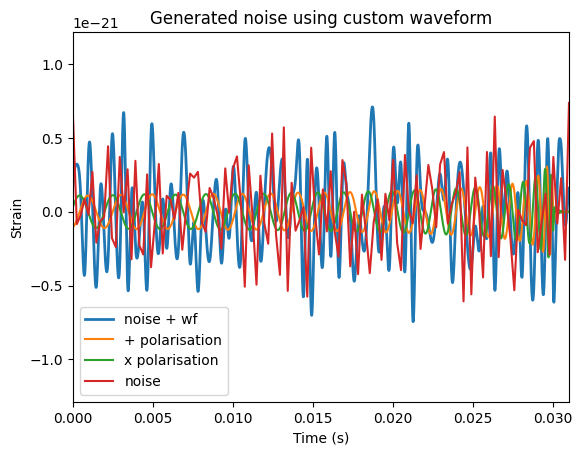

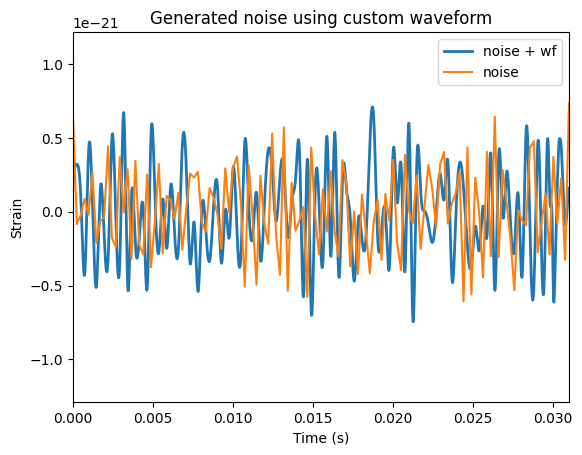

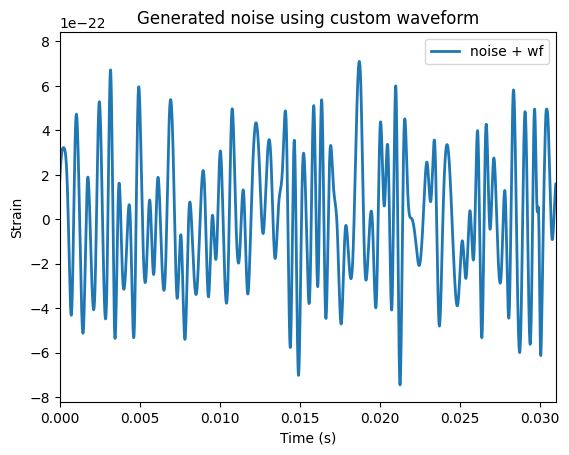

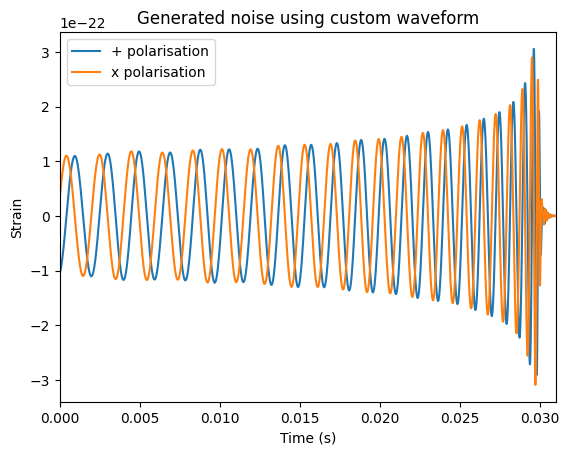

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pycbc.types import TimeSeries
from pycbc.waveform import get_td_waveform
from pycbc import psd
from pycbc import noise

import numpy as np
import matplotlib.pyplot as plt
from pycbc.types import TimeSeries
import pycbc.waveform

from astropy import constants as c

# First Code Snippet
from watpy.utils.coreh5 import CoRe_h5

coreh5_obj = CoRe_h5("/content/BAM_0001/R01/")
c_obj = CoRe_h5("/content/BAM_0001/R01/")

Time = c_obj.read('rh_22')[:,0]       #originally wrong units
M2sec = c.M_sun.value*c.G/c.c**3
Time = Time*2.7*M2sec.value
#Time = Time*c.M_sun.value*c.G.value/(c.c.value**3)
Strain_plus = c_obj.read('rh_22')[:,1]
Strain_cross = c_obj.read('rh_22')[:,2]

# Second Code Snippet
def test_waveform(**args):
	flow = args['f_lower'] # Required parameter
	dt = args['delta_t']   # Required parameter
	fpeak = args['fpeak']  # A new parameter for my model
	strain_plus = args['strain_plus']
	strain_cross = args['strain_cross']

	t = np.arange(0, len(strain_plus)*dt, dt)

	# Interpolate the strain_plus and strain_cross to match the time array
	strain_plus_interp = np.interp(t, Time, strain_plus)
	strain_cross_interp = np.interp(t, Time, strain_cross)

	# Combine the interpolated strains into a complex waveform
	waveform = strain_plus_interp + 1j * strain_cross_interp

	# Return product should be a pycbc time series in this case for each GW polarization
	offset = - len(t) * dt
	wf = TimeSeries(waveform, delta_t=dt, epoch=offset)
	return wf.real(), wf.imag()

pycbc.waveform.add_custom_waveform('test', test_waveform, 'time', force=True)

hp, hc = pycbc.waveform.get_td_waveform(approximant="test",
                                    	f_lower=4.545056e+02, fpeak=8000, #4.545056e+02 and 8k
                                    	delta_t=Time[1]-Time[0],
                                    	strain_plus=Strain_plus,
                                    	strain_cross=Strain_cross)

# Define parameters for generating noise
flow = 30.0
delta_f = 1.0 / 16
flen = int(2048 / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

# Generate noise using the custom waveform
delta_t = 1/4096
# delta_t = Time[1] - Time[0] #1.0/4096
tsamples = int(32/delta_t) #len(Strain_plus) #
ts = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=127)
import scipy
from scipy.interpolate import interp1d
ts_int = scipy.interpolate.interp1d(np.linspace(0,tsamples*delta_t,tsamples), ts, kind='cubic')

plt.figure(0)
plt.plot(Time,hp*1e-21 + ts_int(Time+0.01),'-',lw=2, label="noise + wf")       # displays only positive values of time
plt.plot(Time,hp*1e-21,label='+ polarisation')
plt.plot(Time,hc*1e-21,label='x polarisation')
plt.legend()

# Plot the generated noise
plt.plot(ts.sample_times, ts, label="noise")
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.xlim(0,0.031)
plt.title('Generated noise using custom waveform')
plt.legend()
plt.show()


plt.figure(1)
plt.plot(Time,hp*1e-21 + ts_int(Time+0.01),'-',lw=2, label="noise + wf")       # displays only positive values of time
plt.legend()

# Plot the generated noise
plt.plot(ts.sample_times, ts, label="noise")
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.xlim(0,0.031)
plt.title('Generated noise using custom waveform')
plt.legend()
plt.show()


plt.figure(2)
plt.plot(Time,hp*1e-21 + ts_int(Time+0.01),'-',lw=2, label="noise + wf")       # displays only positive values of time
plt.legend()

# Plot the generated noise
#plt.plot(ts.sample_times, ts, label="noise")
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.xlim(0,0.031)
plt.title('Generated noise using custom waveform')
plt.legend()
plt.show()




plt.figure(3)
plt.plot(Time,hp*1e-21,label='+ polarisation')
plt.plot(Time,hc*1e-21,label='x polarisation')
plt.legend()

# Plot the generated noise
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.xlim(0,0.031)
plt.title('Generated noise using custom waveform')
plt.legend()
plt.show()


#### calculate the power spectral density

Optimal matched filtering requires weighting the frequency components of the potential signal and data by the noise amplitude. We can view this as filtering the data with the time series equivelant of 1 / PSD. To ensure that we can control how much applying this filter to the data, we window the time domain equivelant of the PSD to a specific length. This has effect of losing some information about line behavior in the detector, however, since our signal span a large frequency range, and lines are narrow, this is a negligible effect.

(1e-49, 1e-37)

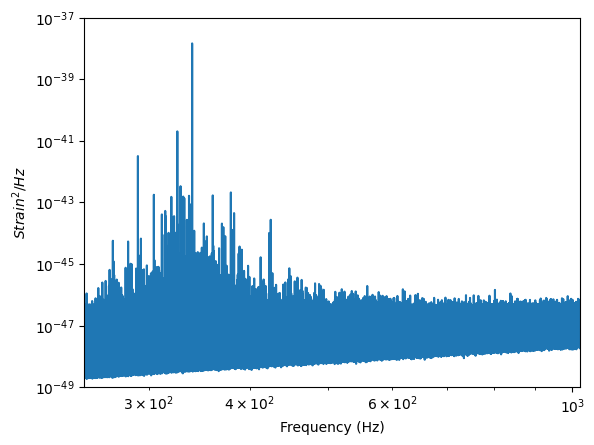

In [ ]:
from pycbc.psd import interpolate, inverse_spectrum_truncation
# Estimate the power spectral density

# We use 4 second samles of our time series in Welch method.
psd = ts.psd(4)

# Now that we have the psd we need to interpolate it to match our data
# and then limit the filter length of 1 / PSD. After this, we can
# directly use this PSD to filter the data in a controlled manner

psd = interpolate(psd, ts.delta_f)

# 1/PSD will now act as a filter with an effective length of 4 seconds
# Since the data has been highpassed above 15 Hz, and will have low values
# below this we need to informat the function to not include frequencies
# below this frequency.
psd = inverse_spectrum_truncation(psd, int(4 * ts.sample_rate),
                                  low_frequency_cutoff=15)


pylab.loglog(psd.sample_frequencies, psd)
pylab.ylabel('$Strain^2 / Hz$')
pylab.xlabel('Frequency (Hz)')
pylab.xlim(250, 1024)
pylab.ylim(1e-49, 1e-37)

#### make your signal model

Conceptually, matched filtering involves laying the potential signal over your data and integrating (after weighting frequencies correctly). If there is a signal in the data that aligns with your 'template', you will get a large value when integrated over.

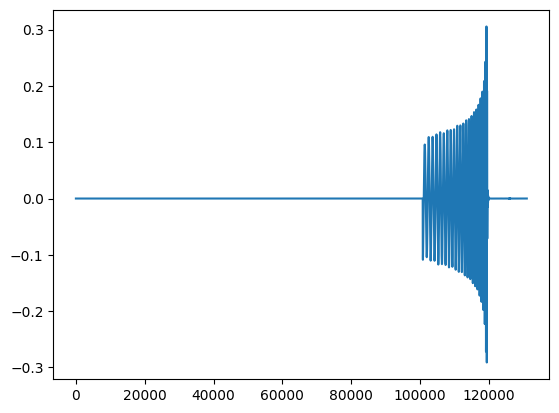

In [ ]:
# In this case we "know" what the signal parameters are. In a search
# we would grid over the parameters and calculate the SNR time series
# for each one

# We'll assume equal masses, which is within the posterior probability
# of GW150914.
m = 2.7 # Solar masses
# Second Code Snippet
def test_waveform(**args):
	flow = args['f_lower'] # Required parameter
	dt = args['delta_t']   # Required parameter
	fpeak = args['fpeak']  # A new parameter for my model
	strain_plus = args['strain_plus']
	strain_cross = args['strain_cross']

	t = np.arange(0, len(strain_plus)*dt, dt)

	# Interpolate the strain_plus and strain_cross to match the time array
	strain_plus_interp = np.interp(t, Time, strain_plus)
	strain_cross_interp = np.interp(t, Time, strain_cross)

	# Combine the interpolated strains into a complex waveform
	waveform = strain_plus_interp + 1j * strain_cross_interp

	# Return product should be a pycbc time series in this case for each GW polarization
	offset = - len(t) * dt
	wf = TimeSeries(waveform, delta_t=dt, epoch=offset)
	return wf.real(), wf.imag()

pycbc.waveform.add_custom_waveform('test', test_waveform, 'time', force=True)

hp, hc = pycbc.waveform.get_td_waveform(approximant="test",
                                    	f_lower=4.545056e+02, fpeak=8000, #4.545056e+02 and 8k
                                    	delta_t=Time[1]-Time[0],
                                    	strain_plus=Strain_plus,
                                    	strain_cross=Strain_cross)

# We will resize the vector to match our data
hp.resize(len(ts))

# The waveform begins at the start of the vector, so if we want the
# SNR time series to correspond to the approximate merger location
# we need to shift the data so that the merger is approximately at the
# first bin of the data.

# This function rotates the vector by a fixed amount of time.
# It treats the data as if it were on a ring. Note that
# time stamps are *not* in general affected, but the true
# position in the vector is.
#
# By convention waveforms returned from `get_td_waveform` have their
# merger stamped with time zero, so we can use the start time to
# shift the merger into position
template = hp.cyclic_time_shift(hp.start_time)
pylab.plot(template)
pylab.show()

#### calculating the signal-to-noise time series

In this section we will now calculate the signal-to-noise time series for our template. We'll take care to handle issues of filter corruption / wraparound by truncating the output time series. We need to account for both the length of the template and 1 / PSD.

(65536,)
(65536,)


ValueError: Waveform does not have same delta_f as psd

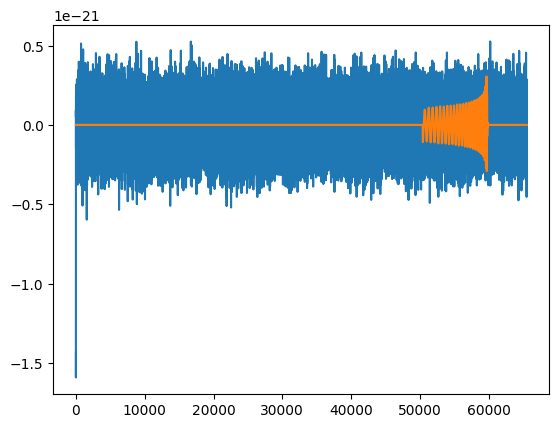

In [ ]:
from pycbc.filter import matched_filter
import numpy as np
from pycbc.filter import resample_to_delta_t, highpass

# Remove the low frequency content and downsample the data to 2048Hz
ts = resample_to_delta_t(highpass(ts, 15.0), 1.0/2048)
template = hp.cyclic_time_shift(hp.start_time) [::2]

print(np.shape(ts))
print(np.shape(template))


pylab.plot(ts)
pylab.plot(template*1e-21)

snr = matched_filter(template, ts,
                     psd=psd, low_frequency_cutoff=20)

# Remove time corrupted by the template filter and the psd filter
# We remove 4 seonds at the beginning and end for the PSD filtering
# And we remove 4 additional seconds at the beginning to account for
# the template length (this is somewhat generous for
# so short a template). A longer signal such as from a BNS, would
# require much more padding at the beginning of the vector.
snr = snr.crop(4 + 4, 4)

# Why am I taking an abs() here?
# The `matched_filter` function actually returns a 'complex' SNR.
# What that means is that the real portion correponds to the SNR
# associated with directly filtering the template with the data.
# The imaginary portion corresponds to filtering with a template that
# is 90 degrees out of phase. Since the phase of a signal may be
# anything, we choose to maximize over the phase of the signal.
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time,
                                                    abs(snrp)))

### Aligning and Subtracting the Proposed Signal

In the previous section we ound a peak in the signal-to-noise for a proposed binary black hole merger. We can use this SNR peak to align our proposal to the data, and to also subtract our proposal from the data.

In [ ]:
from pycbc.filter import sigma
# The time, amplitude, and phase of the SNR peak tell us how to align
# our proposed signal with the data.

# Shift the template to the peak time
dt = time - ts.start_time
aligned = template.cyclic_time_shift(dt)

# scale the template so that it would have SNR 1 in this data
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0)

# Scale the template amplitude and phase to the peak value
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries()
aligned.start_time = ts.start_time

#### Visualize the overlap between the signal and data

To compare the data an signal on equal footing, and to concentrate on the frequency range that is important. We will whiten both the template and the data, and then bandpass both the data and template between 30-300 Hz. In this way, any signal that is in the data is transformed in the same way that the template is.

In [ ]:
# We do it this way so that we can whiten both the template and the data
white_data = (conditioned.to_frequencyseries() / psd**0.5).to_timeseries()

# apply a smoothing of the turnon of the template to avoid a transient
# from the sharp turn on in the waveform.
tapered = aligned.highpass_fir(30, 512, remove_corrupted=False)
white_template = (tapered.to_frequencyseries() / psd**0.5).to_timeseries()

white_data = white_data.highpass_fir(30., 512).lowpass_fir(300, 512)
white_template = white_template.highpass_fir(30, 512).lowpass_fir(300, 512)

# Select the time around the merger
white_data = white_data.time_slice(merger.time-.2, merger.time+.1)
white_template = white_template.time_slice(merger.time-.2, merger.time+.1)

pylab.figure(figsize=[15, 3])
pylab.plot(white_data.sample_times, white_data, label="Data")
pylab.plot(white_template.sample_times, white_template, label="Template")
pylab.legend()
pylab.show()